In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import log_loss
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  

In [2]:
train = pd.read_json("train.json")
test = pd.read_json("test.json")

In [3]:
def showPrecisionRecallCureve(y_test, y_test_predict):  
    y = label_binarize(y_test, classes=[0,1,2])
    score = label_binarize(y_test_predict, classes=[0,1,2])

    precision = dict()
    recall = dict()
    average_precision = dict()

    for i in range(3):
        precision[i], recall[i], _ = precision_recall_curve(y[:, i],
                                                            score[:, i])
        average_precision[i] = average_precision_score(y[:, i], score[:, i])


    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
    precision["micro"], recall["micro"], _ = precision_recall_curve(y.ravel(), score.ravel())
    average_precision["micro"] = average_precision_score(y, score, average="micro")

    plt.clf()
    plt.plot(recall["micro"], precision["micro"], color='red', lw=2,
             label='micro-average Precision-recall curve (area = {0:0.2f})'
                   ''.format(average_precision["micro"]))
    for i, color in zip(range(len(target_names)), colors):
        plt.plot(recall[i], precision[i], color=color, lw=2,
                 label='Precision-recall curve of class {0} (area = {1:0.2f})'
                       ''.format(target_names[i], average_precision[i]))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Extension of Precision-Recall curve to multi-class')
    plt.legend(loc="lower right")
    plt.show()

In [4]:
def showROCCureve(y_test, y_test_predict):  
    y = label_binarize(y_test, classes=[0,1,2])
    score = label_binarize(y_test_predict, classes=[0,1,2])
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    labels = ['high','medium','low']
    colors = ['red', 'blue', 'green', 'grey']

    for i in range(3):
        fpr, tpr, _ = roc_curve(y[:,i], score[:,i])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, color=colors[i],
                 label='ROC %s (area = %0.2f)' % (labels[i], roc_auc))

    mean_tpr /= 3
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='grey', linestyle='--',
             label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

## Display key variables

In [5]:
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [6]:
train.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [7]:
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [8]:
train.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')

<AxesSubplot:>

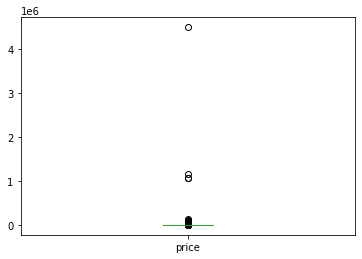

In [9]:
train['price'].plot(kind='box')

2500     1106
3200      881
3000      840
2700      777
2400      772
         ... 
3721        1
12325       1
6481        1
1560        1
2891        1
Name: price, Length: 2688, dtype: int64

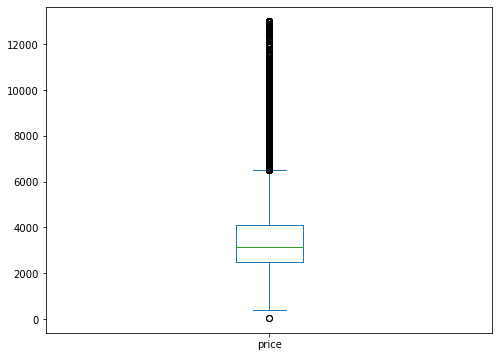

In [10]:
ulimit = np.percentile(train.price.values, 99)
train['price'].loc[train['price'] > ulimit] = ulimit
plt.figure(figsize=(8,6))
train['price'].plot(kind='box')
train['price'].value_counts()

In [11]:
train['interest_level'].value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

Text(0.5, 1.0, 'Apartment per Interest level')

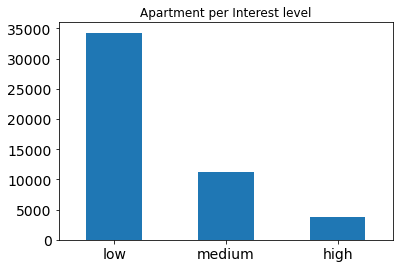

In [12]:
train['interest_level'].value_counts().plot(kind='bar', label='interest_level', rot=0, fontsize=14)
plt.title('Apartment per Interest level')

## Exploring the relationship between key variables

### Exploring the relationship between interest_level and price

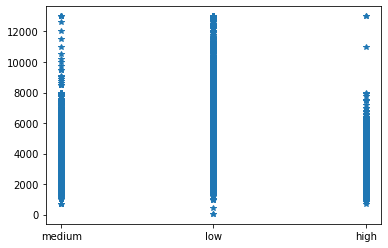

In [13]:
plt.plot(train['interest_level'], train['price'], '*')

### Bathroom number

In [14]:
train['bathrooms'].value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
6.5         1
7.0         1
10.0        1
Name: bathrooms, dtype: int64

<AxesSubplot:>

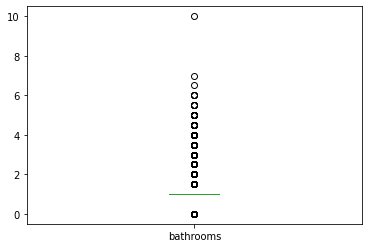

In [15]:
train['bathrooms'].plot(kind='box')

### Exploring the relationship between bathrooms and number of clicking

C:\Users\fangw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


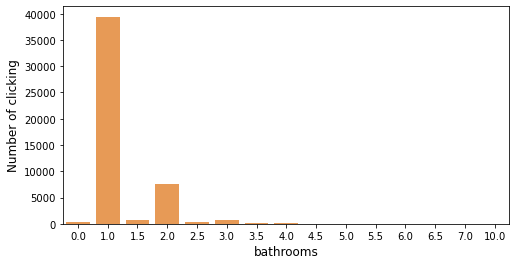

In [16]:
cnt_srs = train['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of clicking', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

### Exploring in the bathroom area,  the relationship between number of clicking and interest level

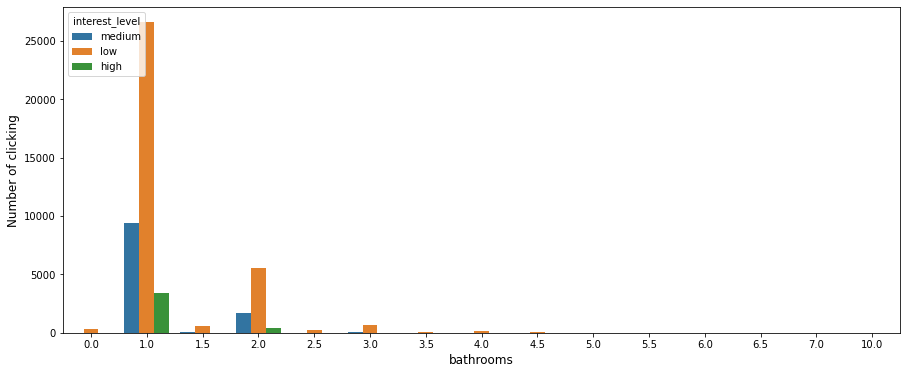

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x ='bathrooms', hue ='interest_level', data=train)
plt.ylabel('Number of clicking', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

### Exploring the relationship between bedrooms and number of occurrences

C:\Users\fangw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


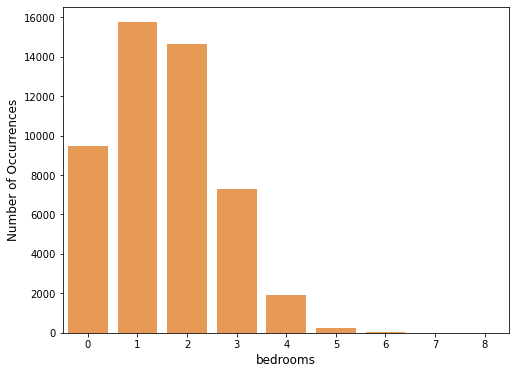

In [18]:
cnt_srs = train['bedrooms'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

### Exploring in the bedroom the relationship between number of occurrences and interest level

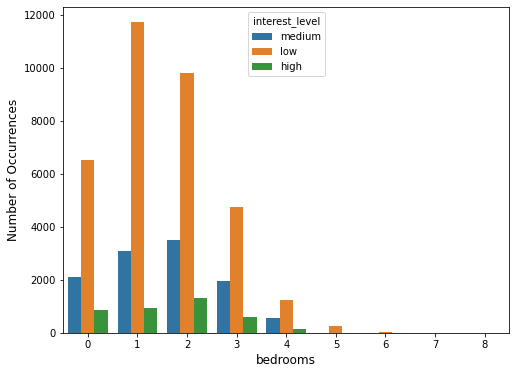

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

### Exploring the relationship among number of bathroom  and interest level

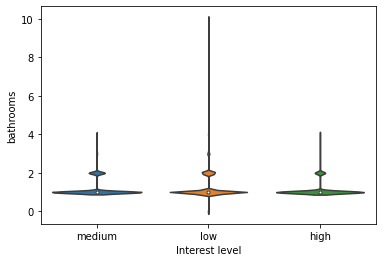

In [20]:
train['bathrooms']=train['bathrooms'].astype(int)
train.loc[train['bathrooms']==0, 'interest_level'] = 'low'
sns.violinplot(x='interest_level', y='bathrooms', data=train)
plt.xlabel('Interest level')
plt.ylabel('bathrooms')
plt.show()

### Exploring the relationship among number of  bedroom and interest level

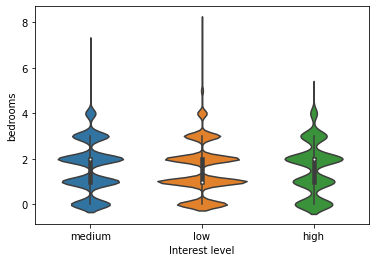

In [21]:
sns.violinplot(x='interest_level', y='bedrooms', data=train)
plt.xlabel('Interest level')
plt.ylabel('bedrooms')
plt.show()

### Exploring the relationship between the listing price and interest level

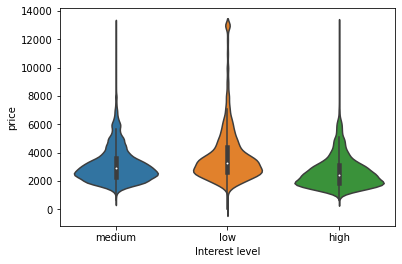

In [22]:
ulimit = np.percentile(train.price.values, 99)

train.loc[train['price'] > ulimit, 'interest_level'] = 'low'
sns.violinplot(x='interest_level', y='price', data=train)
plt.xlabel('Interest level')
plt.ylabel('price')
plt.show()

### Exploring the relationship between number of photos and number of occurrences 

C:\Users\fangw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


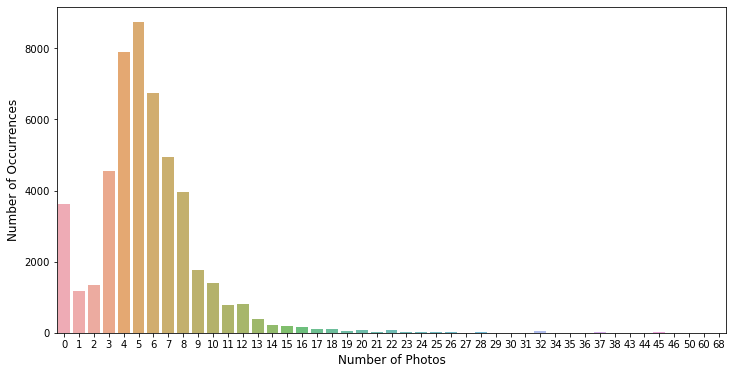

In [23]:
train["num_photos"] = train["photos"].apply(len)
cnt_srs = train['num_photos'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

### Exploring the relationship between number of features and number of occurrences 

C:\Users\fangw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


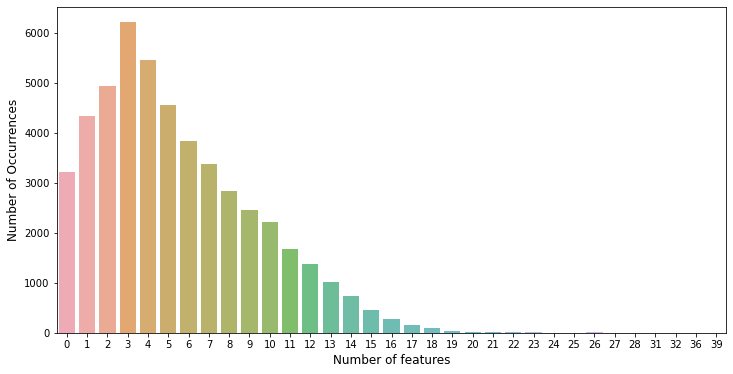

In [24]:
train["num_features"] = train["features"].apply(len)
cnt_srs = train['num_features'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of features', fontsize=12)
plt.show()

In [25]:
train = pd.read_json("train.json")
train["num_features"] = train["features"].apply(len)
train["num_photos"] = train["photos"].apply(len)

## balance data 

In [26]:
low_dataset = train.loc[train["interest_level"] == "low"].head((3839))
medium_dataset = train.loc[train["interest_level"] == "medium"].head((3839))
high_dataset = train.loc[train["interest_level"] == "high"].head((3839))
balanced_df = pd.concat([low_dataset, medium_dataset, high_dataset],axis=0)

In [27]:
numeric_features = ["bathrooms", "bedrooms", "latitude", "longitude", "interest_level","num_features", "num_photos", "price"]
data_set = balanced_df[numeric_features]
# drop outliers 
drop_row = data_set[(data_set["latitude"] == 0) | (data_set["longitude"] == 0) | (data_set["latitude"] > 42) | (data_set["longitude"] < -74.2) | (data_set["price"] > 10000) | (data_set["price"] < 100)].index
data_set = data_set.drop(drop_row) 

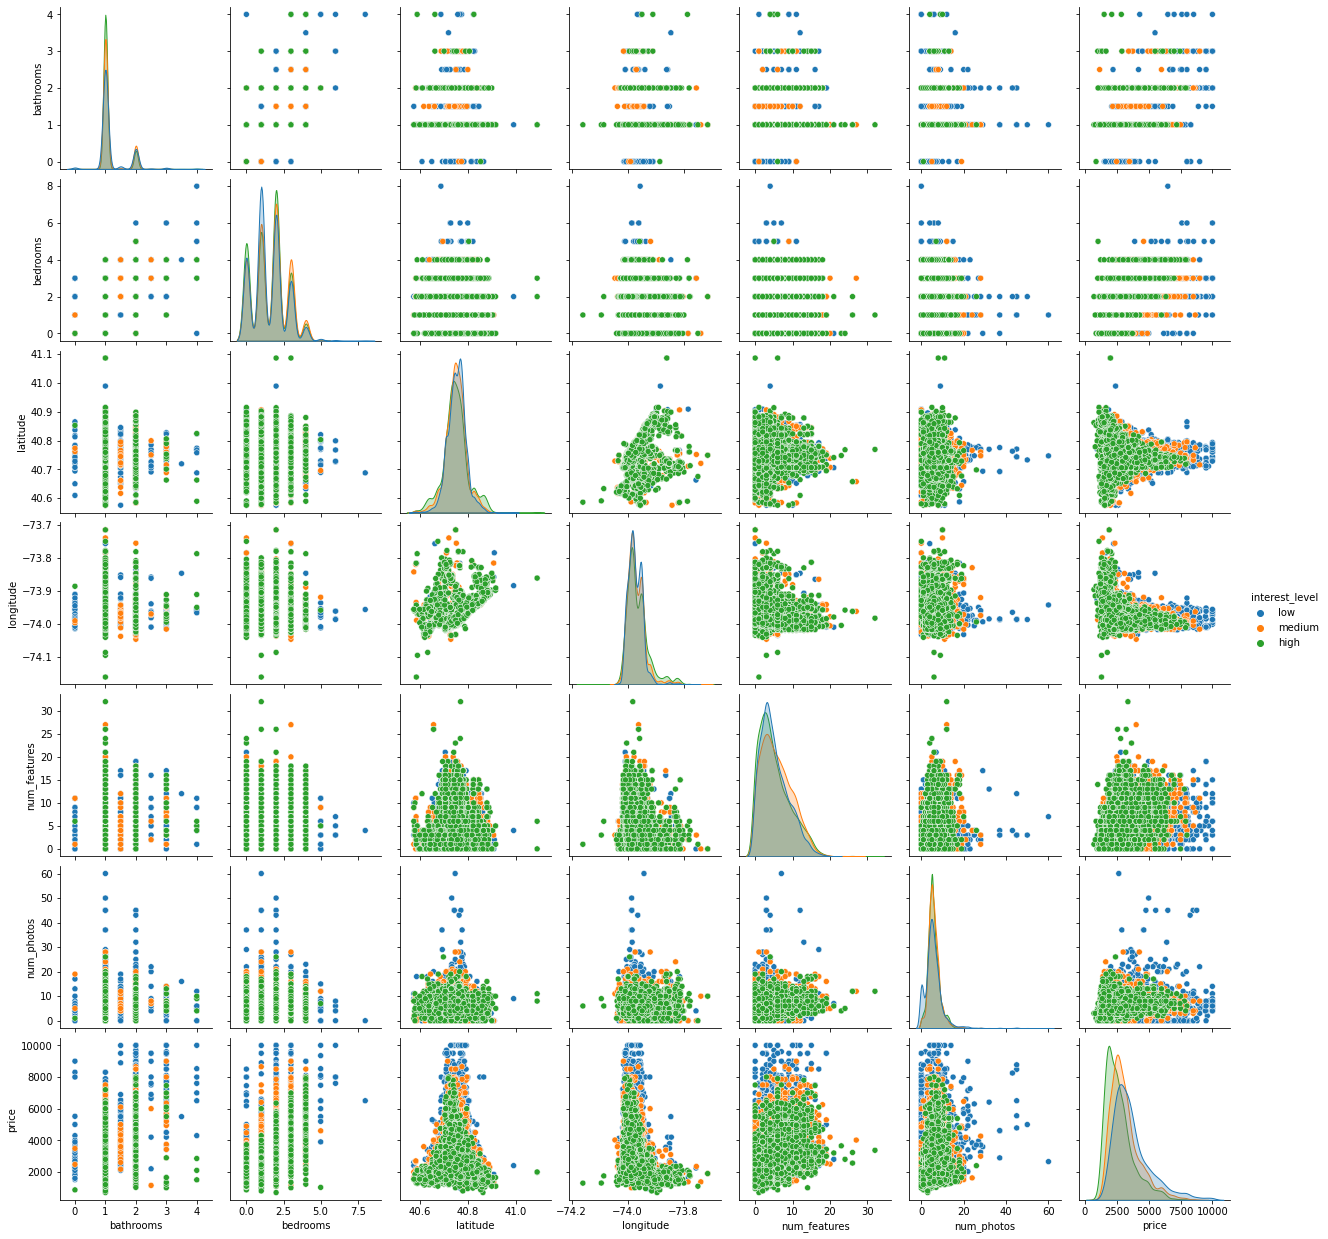

In [28]:
sns.pairplot(data_set, hue="interest_level")
fig = plt.gcf()
fig.savefig("./scatter.jpg")

## Create Features

In [29]:
feature = pd.read_json("train.json")
feature ["num_photos"] = feature ["photos"].apply(len)
feature ["num_features"] = feature ["features"].apply(len)
feature ["num_description_words"] = feature ["description"].apply(lambda x: len(x.split(" ")))
feature ["created"] = pd.to_datetime(feature["created"])
feature ["created_year"] = feature ["created"].dt.year
feature ["created_month"] = feature ["created"].dt.month
feature ["created_day"] = feature ["created"].dt.day

In [30]:
feature_using = ["bathrooms", "bedrooms", "latitude", "longitude", "price",
                   "num_photos", "num_features", "num_description_words",
                   "created_year", "created_month", "created_day"]
print(feature_using)

['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'num_photos', 'num_features', 'num_description_words', 'created_year', 'created_month', 'created_day']


<AxesSubplot:>

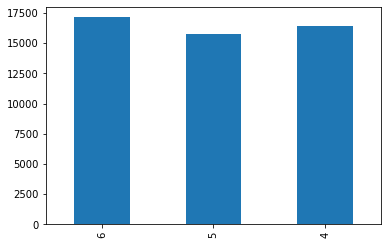

In [31]:
feature['created'].dt.month.value_counts(sort=False).plot(kind='bar')

In [32]:
new_feature = preprocessing.LabelEncoder()
new_feature.fit(list(feature['manager_id'].values))
feature['manager_id'] = new_feature.transform(list(feature['manager_id'].values))

### Adding manager_id to features


In [33]:
feature_using.extend(['manager_id'])
rental = feature[feature_using]
print(rental.head())

    bathrooms  bedrooms  latitude  longitude  price  num_photos  num_features  \
4         1.0         1   40.7108   -73.9539   2400          12             7   
6         1.0         2   40.7513   -73.9722   3800           6             6   
9         1.0         2   40.7575   -73.9625   3495           6             6   
10        1.5         3   40.7145   -73.9425   3000           5             0   
15        1.0         0   40.7439   -73.9743   2795           4             4   

    num_description_words  created_year  created_month  created_day  \
4                      77          2016              6           16   
6                     131          2016              6            1   
9                     119          2016              6           14   
10                     95          2016              6           24   
15                     41          2016              6           28   

    manager_id  
4         2192  
6         2044  
9         2748  
10        1239  
1

### Adding manager_skill as feature


In [34]:
X = feature[feature_using]
Y = feature['interest_level']

temp = pd.concat([X.manager_id, pd.get_dummies(Y)], axis=1).groupby('manager_id').mean()
temp['count'] = X.groupby('manager_id').count().iloc[:,1]

temp['manager_skill'] = temp['high']*2 + temp['medium']

unranked_managers_ixes = temp['count']<20

ranked_managers_ixes = ~unranked_managers_ixes

mean_values = temp.loc[ranked_managers_ixes, ['high','low','medium','manager_skill']].mean()
print(mean_values)
temp.loc[unranked_managers_ixes,['high','low','medium','manager_skill']] = mean_values.values

temp['managers_id'] = temp.index
joined = pd.merge(rental, temp,on='manager_id')
print(joined)

high             0.081314
low              0.673194
medium           0.245492
manager_skill    0.408120
dtype: float64
       bathrooms  bedrooms  latitude  longitude  price  num_photos  \
0            1.0         1   40.7108   -73.9539   2400          12   
1            2.0         2   40.7327   -73.8638   3385          18   
2            1.0         2   40.7039   -73.9425   2400          10   
3            1.0         1   40.7677   -73.9251   2350          17   
4            1.0         3   40.6907   -73.9216   3850           8   
...          ...       ...       ...        ...    ...         ...   
49347        1.5         2   40.6769   -73.9621   3399           4   
49348        3.5         3   40.7644   -73.9580  17000          11   
49349        1.0         0   40.6498   -73.9612   1300           1   
49350        2.0         3   40.7003   -73.9398   2795           9   
49351        1.0         1   40.7359   -74.0042   3600           4   

       num_features  num_description_wor

# Data prepare

In [35]:
# Load datasets
df = pd.read_json("train.json")
# Transform "created" column to numeric features
df["created"] = pd.to_datetime(df["created"])
df["created_year"] = df["created"].dt.year
df["created_month"] = df["created"].dt.month
df["created_day"] = df["created"].dt.day
df["longitude"] = df["longitude"] * -1
# Extract numeric features and label
numeric_features = ["bathrooms", "bedrooms", "latitude", "longitude", "price", "created_year", "created_month", "created_day"]

target_num_map = {'high':0, 'medium':1, 'low':2}
target_names = ['high', 'medium', 'low']

X = df[numeric_features]
y = np.array(df['interest_level'].apply(lambda x: target_num_map[x]))
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Naive Bayes 

## Methods Comparsion

### 1. GaussianNB

In [36]:
import matplotlib.pyplot as plt
from numpy import interp
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
color = sns.color_palette()
%matplotlib inline

pd.options.mode.chained_assignment = None

In [37]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_test_predict = naive_bayes.predict(X_test)

In [38]:
print("accuracy: {}".format(accuracy_score(y_test_predict, y_test)))

accuracy: 0.2812278391247087


In [39]:
print(classification_report(y_test_predict, y_test, target_names=target_names))

              precision    recall  f1-score   support

        high       0.01      0.03      0.02       358
      medium       0.95      0.25      0.40      8930
         low       0.08      0.92      0.15       583

    accuracy                           0.28      9871
   macro avg       0.35      0.40      0.19      9871
weighted avg       0.87      0.28      0.37      9871



In [40]:
print(confusion_matrix(y_test, y_test_predict))

[[  10  746    7]
 [  77 2229   39]
 [ 271 5955  537]]


### 2. CategoricalNB

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
naive_bayes_categoricalNB = CategoricalNB()
naive_bayes_categoricalNB.fit(X_train, y_train)
y_test_predict = naive_bayes_categoricalNB.predict(X_test)

In [43]:
print("accuracy: {}".format(accuracy_score(y_test_predict, y_test)))

accuracy: 0.6916219228041739


In [44]:
print(classification_report(y_test_predict, y_test, target_names=target_names))

              precision    recall  f1-score   support

        high       0.00      0.50      0.01         6
      medium       0.00      0.57      0.00         7
         low       1.00      0.69      0.82      9858

    accuracy                           0.69      9871
   macro avg       0.34      0.59      0.28      9871
weighted avg       1.00      0.69      0.82      9871



### 3. MultinomialNB

In [45]:
naive_bayes_multinomialNB = MultinomialNB()
naive_bayes_multinomialNB.fit(X_train, y_train)
y_test_predict = naive_bayes_multinomialNB.predict(X_test)

In [46]:
print("accuracy: {}".format(accuracy_score(y_test_predict, y_test)))

accuracy: 0.3894235639752811


In [47]:
print(classification_report(y_test_predict, y_test, target_names=target_names))

              precision    recall  f1-score   support

        high       0.68      0.13      0.22      4157
      medium       0.23      0.23      0.23      2244
         low       0.41      0.80      0.54      3470

    accuracy                           0.39      9871
   macro avg       0.44      0.39      0.33      9871
weighted avg       0.48      0.39      0.34      9871



### 4. ComplementNB

In [89]:
naive_bayes_complementNB = ComplementNB()
naive_bayes_complementNB.fit(X_train, y_train)
y_test_predict = naive_bayes_complementNB.predict(X_test)

In [90]:
print("accuracy: {}".format(accuracy_score(y_test_predict, y_test)))

accuracy: 0.4627697295106879


In [91]:
print(classification_report(y_test_predict, y_test, target_names=target_names))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         0
      medium       0.74      0.26      0.39      6232
         low       0.43      0.80      0.56      3639

    accuracy                           0.46      9871
   macro avg       0.39      0.36      0.32      9871
weighted avg       0.62      0.46      0.45      9871



C:\Users\fangw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fangw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fangw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### CategoricalNB with Balanced data

In [92]:
df = balanced_df
balanced_df["created"] = pd.to_datetime(balanced_df["created"])
balanced_df["created_year"] = balanced_df["created"].dt.year
balanced_df["created_month"] = balanced_df["created"].dt.month
balanced_df["created_day"] = balanced_df["created"].dt.day
balanced_df["longitude"] = balanced_df["longitude"] * -1

In [93]:
numeric_features = ["bathrooms", "bedrooms", "latitude", "longitude", "price", "created_year", "created_month", "created_day"]

target_num_map = {'high':0, 'medium':1, 'low':2}
target_names = ['high', 'medium', 'low']

X_balanced = balanced_df[numeric_features]
y_balanced = np.array(balanced_df['interest_level'].apply(lambda x: target_num_map[x]))


In [94]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_balanced, y_balanced, test_size=0.2)

In [95]:
naive_bayes_categoricalNB = CategoricalNB()
naive_bayes_categoricalNB.fit(X_train_b, y_train_b)
y_test_predict = naive_bayes_categoricalNB.predict(X_test_b)

In [96]:
print("accuracy: {}".format(accuracy_score(y_test_predict, y_test_b)))

accuracy: 0.5950520833333334


In [97]:
print(classification_report(y_test_predict, y_test_b, target_names=target_names))

              precision    recall  f1-score   support

        high       0.68      0.92      0.78       574
      medium       0.62      0.46      0.52      1050
         low       0.49      0.53      0.51       680

    accuracy                           0.60      2304
   macro avg       0.59      0.64      0.61      2304
weighted avg       0.59      0.60      0.58      2304



# K Neighbors 

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [100]:
k_neighbors = KNeighborsClassifier(n_neighbors=50)
k_neighbors.fit(X_train, y_train)
y_test_predict = k_neighbors.predict(X_test)

In [101]:
print("accuracy: {}".format(accuracy_score(y_test_predict, y_test)))

accuracy: 0.6908114679363793


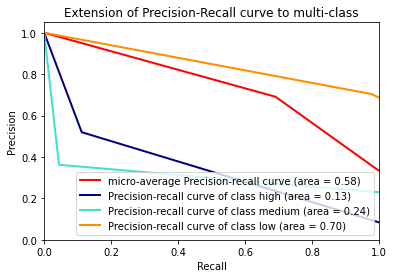

In [102]:
showPrecisionRecallCureve(y_test, y_test_predict)

In [103]:
print(classification_report(y_test_predict, y_test, target_names=target_names))

              precision    recall  f1-score   support

        high       0.11      0.52      0.18       179
      medium       0.04      0.36      0.08       276
         low       0.98      0.70      0.82      9416

    accuracy                           0.69      9871
   macro avg       0.38      0.53      0.36      9871
weighted avg       0.94      0.69      0.79      9871



In [104]:
print(confusion_matrix(y_test, y_test_predict))

[[  93   64  673]
 [  48  100 2117]
 [  38  112 6626]]


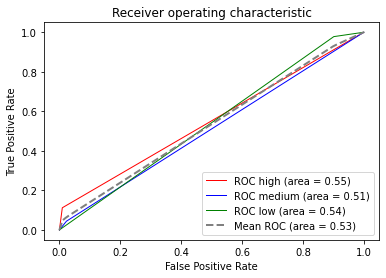

In [105]:
showROCCureve(y_test, y_test_predict)

## with Balanced data

In [106]:
naive_bayes_kNeighborsClassifier = KNeighborsClassifier()
naive_bayes_kNeighborsClassifier.fit(X_train_b, y_train_b)
y_test_predict = naive_bayes_kNeighborsClassifier.predict(X_test_b)

In [107]:
print("accuracy: {}".format(accuracy_score(y_test_predict, y_test_b)))

accuracy: 0.4856770833333333


In [108]:
print(classification_report(y_test_predict, y_test_b, target_names=target_names))

              precision    recall  f1-score   support

        high       0.59      0.56      0.57       812
      medium       0.47      0.41      0.44       883
         low       0.40      0.49      0.44       609

    accuracy                           0.49      2304
   macro avg       0.48      0.49      0.48      2304
weighted avg       0.49      0.49      0.49      2304



# Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_test_predict = random_forest.predict(X_test)

In [110]:
print("accuracy: {}".format(accuracy_score(y_test_predict, y_test)))

accuracy: 0.6920271502380712


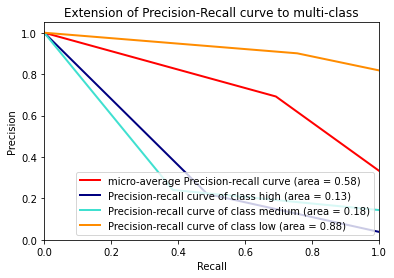

In [111]:
showPrecisionRecallCureve(y_test_predict, y_test)

In [112]:
print(classification_report(y_test_predict, y_test, target_names=target_names))

              precision    recall  f1-score   support

        high       0.22      0.49      0.30       378
      medium       0.24      0.38      0.30      1418
         low       0.90      0.76      0.82      8075

    accuracy                           0.69      9871
   macro avg       0.45      0.54      0.47      9871
weighted avg       0.78      0.69      0.73      9871



In [113]:
print(confusion_matrix(y_test, y_test_predict))

[[ 184  282  364]
 [ 111  545 1609]
 [  83  591 6102]]


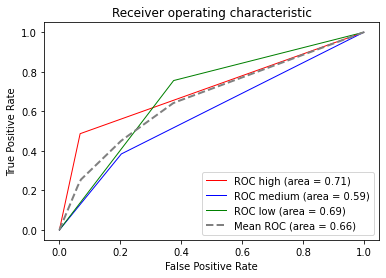

In [114]:
showROCCureve(y_test_predict, y_test)

## with Balanced data

In [115]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_b, y_train_b)
y_test_predict = random_forest.predict(X_test_b)

In [116]:
print("accuracy: {}".format(accuracy_score(y_test_predict, y_test_b)))

accuracy: 0.6401909722222222


In [117]:
print(classification_report(y_test_predict, y_test_b, target_names=target_names))

              precision    recall  f1-score   support

        high       0.74      0.88      0.80       647
      medium       0.55      0.50      0.53       862
         low       0.63      0.59      0.61       795

    accuracy                           0.64      2304
   macro avg       0.64      0.66      0.65      2304
weighted avg       0.63      0.64      0.63      2304



# Ada boost

In [118]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=2000)
ada.fit(X_train, y_train)
y_test_predict = ada.predict(X_test)

In [119]:
print("accuracy: {}".format(accuracy_score(y_test_predict, y_test)))

accuracy: 0.6983081754634789


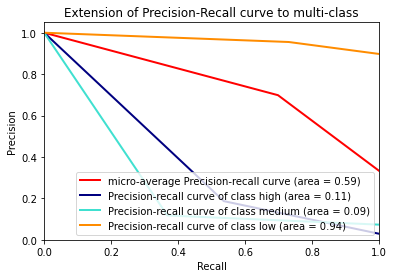

In [120]:
showPrecisionRecallCureve(y_test_predict, y_test)

In [121]:
target_names = ['high', 'medium', 'low']
print(classification_report(y_test_predict, y_test, target_names=target_names))

              precision    recall  f1-score   support

        high       0.19      0.54      0.28       289
      medium       0.12      0.37      0.18       723
         low       0.96      0.73      0.83      8859

    accuracy                           0.70      9871
   macro avg       0.42      0.54      0.43      9871
weighted avg       0.87      0.70      0.76      9871



In [122]:
confusion_matrix(y_test, y_test_predict)

array([[ 155,  203,  472],
       [  84,  266, 1915],
       [  50,  254, 6472]], dtype=int64)

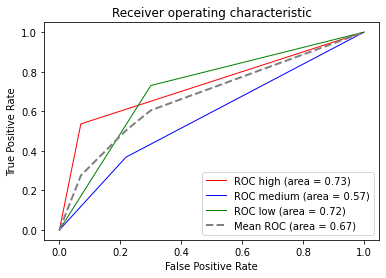

In [123]:
showROCCureve(y_test_predict, y_test)

## With balanced data

In [124]:
ada.fit(X_train_b, y_train_b)
y_test_predict = ada.predict(X_test_b)

In [125]:
print("accuracy: {}".format(accuracy_score(y_test_predict, y_test_b)))

accuracy: 0.6497395833333334


In [126]:
target_names = ['high', 'medium', 'low']
print(classification_report(y_test_predict, y_test_b, target_names=target_names))

              precision    recall  f1-score   support

        high       0.72      0.89      0.79       625
      medium       0.61      0.51      0.56       923
         low       0.62      0.62      0.62       756

    accuracy                           0.65      2304
   macro avg       0.65      0.67      0.66      2304
weighted avg       0.64      0.65      0.64      2304



# Support Vector Machine

In [127]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_test_predict = svc.predict(X_test)

In [128]:
print("accuracy: {}".format(accuracy_score(y_test_predict, y_test)))

accuracy: 0.6864552730219836


C:\Users\fangw\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\fangw\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\fangw\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
C:\Users\fangw\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


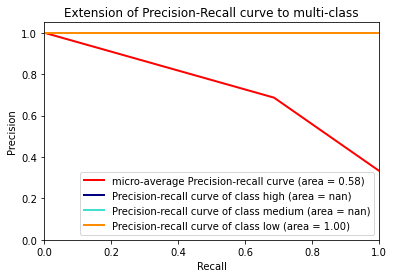

In [129]:
showPrecisionRecallCureve(y_test_predict, y_test)

In [130]:
target_names = ['high', 'medium', 'low']
print(classification_report(y_test_predict, y_test, target_names=target_names))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         0
      medium       0.00      0.00      0.00         0
         low       1.00      0.69      0.81      9871

    accuracy                           0.69      9871
   macro avg       0.33      0.23      0.27      9871
weighted avg       1.00      0.69      0.81      9871



C:\Users\fangw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fangw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fangw\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [131]:
confusion_matrix(y_test, y_test_predict)

array([[   0,    0,  830],
       [   0,    0, 2265],
       [   0,    0, 6776]], dtype=int64)

C:\Users\fangw\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
C:\Users\fangw\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
C:\Users\fangw\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:941: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "


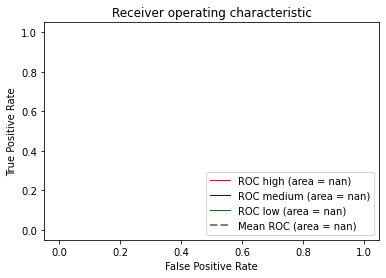

In [132]:
showROCCureve(y_test_predict, y_test)

## with balanced data

In [133]:
svc = SVC()
svc.fit(X_train_b, y_train_b)
y_test_predict = svc.predict(X_test_b)

In [134]:
print("accuracy: {}".format(accuracy_score(y_test_predict, y_test_b)))

accuracy: 0.4518229166666667


In [135]:
target_names = ['high', 'medium', 'low']
print(classification_report(y_test_predict, y_test_b, target_names=target_names))

              precision    recall  f1-score   support

        high       0.62      0.48      0.54      1015
      medium       0.31      0.39      0.34       622
         low       0.43      0.48      0.45       667

    accuracy                           0.45      2304
   macro avg       0.45      0.45      0.44      2304
weighted avg       0.48      0.45      0.46      2304



# Gradient Boosting Classifier

## Step 1: Define Functions

In [136]:
def normalize(df):
    df["num_photos"] = df["photos"].apply(len)
    df["num_features"] = df["features"].apply(len)
    df["num_description_words"] = df["description"].apply(lambda x: len(x.split(" ")))
    df["created"] = pd.to_datetime(df["created"])
    df["created_year"] = df["created"].dt.year
    df["created_month"] = df["created"].dt.month
    df["created_day"] = df["created"].dt.day
    featureNew = preprocessing.LabelEncoder()
    featureNew.fit(list(df['manager_id'].values))
    df['manager_id'] = featureNew.transform(list(df['manager_id'].values))
    featureNew = preprocessing.LabelEncoder()
    featureNew.fit(list(df['building_id'].values))
    df['building_id'] = featureNew.transform(list(df['building_id'].values))

def manager_skill(x_train, y_train):
    temp = pd.concat([x_train.manager_id, pd.get_dummies(y_train)], axis=1).groupby('manager_id').mean()
    temp['count'] = x_train.groupby('manager_id').count().iloc[:,0]
    temp['manager_skill'] = temp['high']*2 + temp['medium']    
    return temp

def mean_skill(temp):
    unranked_managers_ixes = temp['count']<5
    ranked_managers_ixes = ~unranked_managers_ixes
    mean_values = temp.loc[ranked_managers_ixes, ['high','low','medium','manager_skill']].mean()
    temp.loc[unranked_managers_ixes,['high','low','medium','manager_skill']] = mean_values.values  
    return mean_values

def price_per_bedroom(x):
    x['price_per_bedroom']=0;
    x.loc[:, 'price_per_bedroom'] = x.apply(lambda row: valuation_formula(row['bedrooms'], row['price']), axis=1)

def bedratiobath(x):
    x['bed_bath_ratio']=0;
    x.loc[:, 'bed_bath_ratio'] = x.apply(lambda row: valuation_formula(row['bathrooms'], row['bedrooms']), axis=1)
    
def valuation_formula(x, y):
    if x>0:
        return y/x
    else:
        return y

## Step 2: Prepare Data

In [137]:
# Normalize data frame
df = pd.read_json("train.json")
normalize(df) 

In [138]:
# Adding interest_level to original features
original_features = ["bathrooms", "bedrooms", "latitude", "longitude", "price",
                   "num_photos", "num_features", "num_description_words",
                   "created_year", "created_month", "created_day", "manager_id","building_id"]

x = df[original_features]
target_num_map = {'high':0, 'medium':1, 'low':2}
y = np.array(df['interest_level'].apply(lambda x: target_num_map[x]))

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33)

In [139]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_val', x_val.shape)
print('y_val', y_val.shape)
# Visulizing training data
print(x_train.head())
x_train.to_csv("xtrain.csv")

x_train (33065, 13)
y_train (33065,)
x_val (16287, 13)
y_val (16287,)
        bathrooms  bedrooms  latitude  longitude  price  num_photos  \
80608         1.0         0   40.7263   -73.9847   2300           0   
16937         1.0         0   40.7979   -73.9368   1200           1   
116354        1.0         2   40.7055   -74.0097   3500          12   
44851         1.0         1   40.7199   -73.9968   3250           3   
70126         1.0         1   40.7257   -73.9780   2050           4   

        num_features  num_description_words  created_year  created_month  \
80608              0                      9          2016              5   
16937              0                     16          2016              6   
116354            16                    142          2016              4   
44851              0                    129          2016              5   
70126              2                    184          2016              5   

        created_day  manager_id  building_id  

In [140]:
current_features = ["bathrooms", "bedrooms", "latitude", "longitude", "price",
                   "num_photos", "num_features", "num_description_words",
                   "created_year", "created_month", "created_day", 'high','low','medium',
                   "building_id",'manager_id']

## Step 3: Make Prediction 

In [141]:
# Train model
these_features = [f for f in current_features if f not in ["created_year", 'high','low','medium']]

In [142]:
# Method : Machine Learning Model --  Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=2000)
clf.fit(x_train[these_features], y_train)
y_preds = clf.predict_proba(x_val[these_features])
log_loss(y_val, y_preds)

0.5795733197208991

In [143]:
preds = clf.predict(x_val[these_features])

In [144]:
print("accuracy: {}".format(accuracy_score(preds, y_val)))

accuracy: 0.7461779333210536


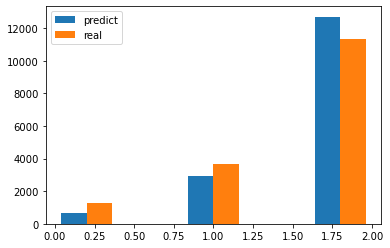

accuracy: 0.7461779333210536


In [145]:
bins = np.linspace(0, 2, 6)
data = np.vstack([preds, y_val]).T
plt.hist(data, bins, alpha=1, label=['predict','real'])
plt.legend(loc='upper left')
plt.show()

print("accuracy: {}".format(accuracy_score(preds, y_val)))

In [146]:
#Create  classification report and heatmap

              precision    recall  f1-score   support

        high       0.28      0.54      0.37       662
      medium       0.39      0.49      0.43      2927
         low       0.91      0.82      0.86     12698

    accuracy                           0.75     16287
   macro avg       0.53      0.62      0.55     16287
weighted avg       0.79      0.75      0.77     16287



<AxesSubplot:>

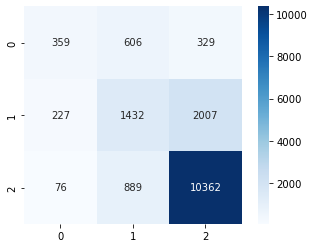

In [147]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import seaborn as sns


target_names = ['high', 'medium', 'low']
print(classification_report(preds, y_val, target_names=target_names))

cm = metrics.confusion_matrix(y_val, preds)

sns.heatmap(cm, annot=True, fmt='0g', cmap='Blues', square=True, cbar=True)

In [148]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, preds)

array([[  359,   606,   329],
       [  227,  1432,  2007],
       [   76,   889, 10362]], dtype=int64)

In [149]:
# Compute Precision-Recall and plot curve

In [150]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

y = label_binarize(y_val, classes=[0,1,2])
score = label_binarize(preds, classes=[0,1,2])

precision = dict()
recall = dict()
average_precision = dict()

for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y[:, i],
                                                        score[:, i])
    average_precision[i] = average_precision_score(y[:, i], score[:, i])

In [151]:
# Plot Precision-Recall curve for each class

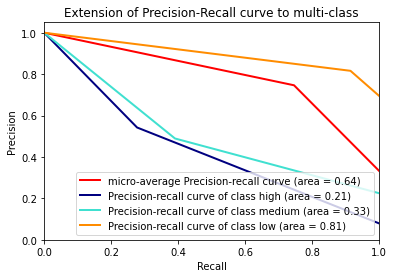

In [152]:
from itertools import cycle
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
precision["micro"], recall["micro"], _ = precision_recall_curve(y.ravel(),score.ravel())
average_precision["micro"] = average_precision_score(y, score,average="micro")

plt.clf()
plt.plot(recall["micro"], precision["micro"], color='red', lw=2,
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i, color in zip(range(len(target_names)), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-recall curve of class {0} (area = {1:0.2f})'
                   ''.format(target_names[i], average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(loc="lower right")
plt.show()

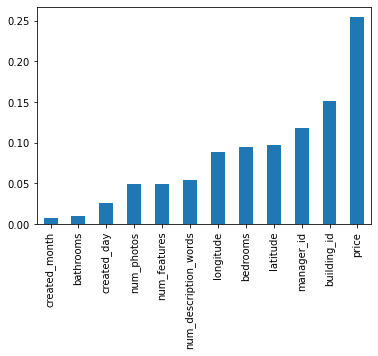

[1 0 1 ... 0 0 1]
[1 1 1 ... 1 0 1]


In [153]:
pd.Series(index = these_features, data = clf.feature_importances_).sort_values().plot(kind = 'bar')
plt.show()

y = label_binarize(y_val, classes=[0,1,2])
score = label_binarize(preds, classes=[0,1,2])

print(y[:,2])
print(score[:,2])

In [154]:
# Roc curve

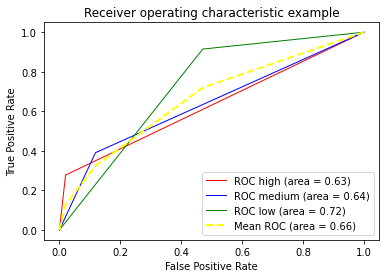

In [155]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
labels = ['high','medium','low']
colors = ['red', 'blue', 'green', 'yellow']

for i in range(3):
    fpr, tpr, _ = roc_curve(y[:,i], score[:,i])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, color=colors[i],
             label='ROC %s (area = %0.2f)' % (labels[i], roc_auc))

mean_tpr /= 3
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='yellow', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## With Balanced Data 

In [156]:
df = balanced_df
normalize(df) 
original_features = ["bathrooms", "bedrooms", "latitude", "longitude", "price",
                   "num_photos", "num_features", "num_description_words",
                   "created_year", "created_month", "created_day", "manager_id","building_id"]
x = df[original_features]
target_num_map = {'high':0, 'medium':1, 'low':2}
y = np.array(df['interest_level'].apply(lambda x: target_num_map[x]))

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33)

In [157]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=2000)
clf.fit(x_train[these_features], y_train)
y_preds = clf.predict_proba(x_val[these_features])
log_loss(y_val, y_preds)

0.7331620835392076

In [158]:
preds = clf.predict(x_val[these_features])
print("accuracy: {}".format(accuracy_score(preds, y_val)))
confusion_matrix(y_val, preds)

accuracy: 0.696921862667719


array([[971, 268,  43],
       [147, 812, 319],
       [ 27, 348, 866]], dtype=int64)

In [159]:
target_names = ['high', 'medium', 'low']
print(classification_report(preds, y_val, target_names=target_names))

              precision    recall  f1-score   support

        high       0.76      0.85      0.80      1145
      medium       0.64      0.57      0.60      1428
         low       0.70      0.71      0.70      1228

    accuracy                           0.70      3801
   macro avg       0.70      0.71      0.70      3801
weighted avg       0.69      0.70      0.69      3801

